Import Necessary Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import pandas_profiling as pp
%matplotlib inline

#### Import San Antonio Policing DataSet

In [5]:
# Import San Antonio DataSet 
df = pd.read_csv('SanAntonio.csv')

print('Pre-processed Shape:',df.shape)

/var/folders/z1/yk19_3qn0r7_6b4cqg7hz5yr0000gn/T/ipykernel_51026/1740847598.py:2: DtypeWarning: Columns (16,18,29,30,31) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('SanAntonio.csv')


Pre-processed Shape: (1040428, 32)


In [6]:
df.columns

Index(['raw_row_number', 'date', 'time', 'location', 'lat', 'lng', 'district',
       'substation', 'subject_age', 'subject_race', 'subject_sex', 'type',
       'violation', 'arrest_made', 'citation_issued', 'outcome',
       'contraband_found', 'search_conducted', 'search_basis', 'speed',
       'posted_speed', 'vehicle_color', 'vehicle_make', 'vehicle_model',
       'vehicle_registration_state', 'vehicle_year', 'raw_race',
       'raw_posted_speed', 'raw_actual_speed', 'raw_search_reason',
       'raw_contraband_or_evidence', 'raw_custodial_arrest_made'],
      dtype='object')

Filter for Columns of Interest

In [7]:
# Filter for Vehicular Stop Data
df = df[df['type'] == 'vehicular']

# Filter for Columns of Interests 
columns = ['date','district','substation','subject_age','subject_race','subject_sex','violation','arrest_made','citation_issued','outcome','search_conducted','search_basis','raw_search_reason']


df_filtered = df.filter(columns, axis = 1)


In [8]:
df_filtered.shape

(876933, 13)

In [9]:
print('Filtered Columns:', df_filtered.columns)


Filtered Columns: Index(['date', 'district', 'substation', 'subject_age', 'subject_race',
       'subject_sex', 'violation', 'arrest_made', 'citation_issued', 'outcome',
       'search_conducted', 'search_basis', 'raw_search_reason'],
      dtype='object')


 Check for Null Values 

In [10]:
# Check for Number of Null Values by Columns 
df_filtered.isnull().sum()

#Drop Handling Missing Values 
df_filtered['subject_age'] = df_filtered['subject_age'].fillna(df_filtered['subject_age'].mode()[0])

#### Check Data Type

In [11]:
df_filtered['date'] = pd.to_datetime(df_filtered['date'])
df_filtered['Year'] = df_filtered['date'].dt.year
df_filtered['district'] = df_filtered['district'].astype('category')
df_filtered['subject_race']= df_filtered['subject_race'].astype('category')
df_filtered['subject_sex'] = df_filtered['subject_sex'].astype('category')
df_filtered['subject_age'] = df_filtered['subject_age'].astype('int')
df_filtered['substation'] = df_filtered['substation'].astype('category')
df_filtered['outcome'] = df_filtered['outcome'].astype('category')
df_filtered['search_basis'] = df_filtered['search_basis'].astype('category')
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 876933 entries, 0 to 1040427
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   date               876933 non-null  datetime64[ns]
 1   district           805909 non-null  category      
 2   substation         805909 non-null  category      
 3   subject_age        876933 non-null  int64         
 4   subject_race       876739 non-null  category      
 5   subject_sex        876326 non-null  category      
 6   violation          876933 non-null  object        
 7   arrest_made        876933 non-null  bool          
 8   citation_issued    876933 non-null  bool          
 9   outcome            876933 non-null  category      
 10  search_conducted   876933 non-null  bool          
 11  search_basis       7637 non-null    category      
 12  raw_search_reason  147879 non-null  object        
 13  Year               876933 non-null  int64  

Range of Data

In [12]:
print('Earliest Record', df_filtered.date.min())
print('Latest Record', df_filtered.date.max())

Earliest Record 2012-01-01 00:00:00
Latest Record 2018-04-19 00:00:00


In [13]:
# # Filter data between Jan 2012 - Jan 2018
# df_filtered = df_filtered.loc[(df['date'] >= '2012-01-01')
#                      & (df['date'] < '2018-01-01')]
# # Sort Dataframe by Year
# df_filtered = df_filtered.sort_values(by = 'date', ascending = True)

In [14]:
df_filtered.shape

(876933, 14)

### Summary Statistics

In [15]:
# profile = pp.ProfileReport(df_filtered, title="Pandas Profiling Report")
# profile

In [16]:
black = df_filtered.loc[df_filtered['subject_race'] == 'black']
white = df_filtered.loc[df_filtered['subject_race'] == 'white']
hispanic =  df_filtered.loc[df_filtered['subject_race'] == 'hispanic']
asian = df_filtered.loc[df_filtered['subject_race'] == 'asian/pacific islander']
other = df_filtered.loc[df_filtered['subject_race'] == 'other']
unknown = df_filtered.loc[df_filtered['subject_race'] == 'unknown']

In [17]:
def violations_by_race(race_category):
     violations = []

     for encounter in race_category['violation']:
          item = encounter.split('|')
          for j in item: 
               violations.append(j)
     
     values, counts = np.unique(violations, return_counts=True)

     top_10_vals = sorted(values, reverse = True)[0:10]
     top_10_counts = sorted(counts, reverse = True)[0:10]

     violations_dict = dict(zip(top_10_vals, top_10_counts))

     # violations_df = pd.DataFrame.from_dict(violations_dict, orient = 'index')
     
     return violations_dict



In [18]:
print(violations_by_race(black))
print(violations_by_race(white))
print(violations_by_race(hispanic))
print(violations_by_race(asian))

{'WRONG WAY ONE-WAY STREET': 46829, 'WRECKER SERVICE': 11122, 'WINDSHIELD OBSTRUCTED-MATERIAL OR OBJECTAFFIXED': 9169, 'VEHICLE STRUCTURES AND ANCHOR POINTS': 5187, 'VEHICLE FOR HIRE (MISCELLANEOUS)': 4108, 'USE OF TIEDOWNS': 3945, 'USE OF HAND-HELD MOBILE COMMUNICATION DEVICE': 3337, 'UNSAFE VEHICLE': 3318, 'UNSAFE SPEED - CONSTRUCTION ZONE': 2431, 'UNSAFE SPEED': 2002}
{'WRONG WAY ONE-WAY STREET': 172497, 'WRECKER SERVICE': 28977, 'WINDSHIELD WIPERS': 25625, 'WINDSHIELD OBSTRUCTED-MATERIAL OR OBJECTAFFIXED': 17080, 'VIOLATION OF REAR LOAD EXTENSIONS': 16337, 'VEHICLE STRUCTURES AND ANCHOR POINTS': 16145, 'VEHICLE FOR HIRE (MISCELLANEOUS)': 9974, 'USE OF TIEDOWNS': 9676, 'USE OF HAND-HELD MOBILE COMMUNICATION DEVICE': 9071, 'UNSAFE SPEED - CONSTRUCTION ZONE': 9042}
{'WRONG WAY ONE-WAY STREET': 234941, 'WRECKER SERVICE': 68081, 'WINDSHIELD WIPERS': 49746, 'WINDSHIELD OBSTRUCTED-MATERIAL OR OBJECTAFFIXED': 43362, 'VIOLATION OF REAR LOAD EXTENSIONS': 27324, 'VEHICLE STRUCTURES AND ANCHOR

By Race Category

In [19]:
df_filtered['age_bins'] = pd.cut(x=df_filtered['subject_age'], bins=[18, 24, 44, 64, 100])
df_filtered['age_bins'].unique()

[(18.0, 24.0], (24.0, 44.0], (44.0, 64.0], (64.0, 100.0], NaN]
Categories (4, interval[int64, right]): [(18, 24] < (24, 44] < (44, 64] < (64, 100]]

In [20]:
race_cross = pd.crosstab(index = df_filtered['subject_race'], columns = df_filtered.outcome, margins = True)
age_cross = pd.crosstab(index = df_filtered['subject_race'], columns = df_filtered.age_bins, margins = True)
race_age = age_cross.merge(race_cross.reset_index(),on="subject_race")
race_age

,subject_race,"(18, 24]","(24, 44]","(44, 64]","(64, 100]",All_x,arrest,citation,All_y
0,asian/pacific islander,1929,4751,2137,293,9110,12,9350,9362
1,black,19131,43552,16746,1899,81328,266,83263,83529
2,hispanic,101689,238713,89002,13023,442427,1063,457031,458094
3,other,4018,11476,4302,571,20367,37,20715,20752
4,unknown,250,404,167,26,847,7,885,892
5,white,60733,148022,71605,11868,292228,881,303229,304110
6,All,187750,446918,183959,27680,846307,2266,874473,876739


#### Frequency of Race, Stratified by Year

In [21]:
# race_data = df_filtered.groupby(['Year','subject_race']).agg({'subject_race':'count'})
# race_data['%'] = race_data.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).round(decimals = 2)
# race_data = race_data.rename(columns = {'subject_race': 'n'})

Visualization of # of Stop by Race 

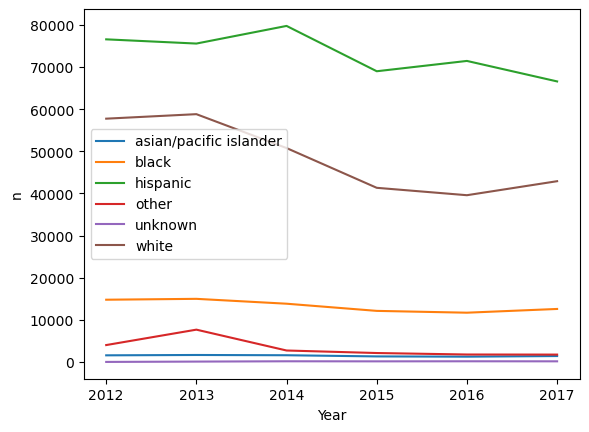

In [22]:
# Filter data between Jan 2012 - Jan 2018
df_dates = df_filtered.loc[(df['date'] >= '2012-01-01')
                     & (df['date'] < '2018-01-01')]
# Sort Dataframe by Year
df_dates = df_dates.sort_values(by = 'date', ascending = True)


race = df_dates.groupby(['Year','subject_race'], as_index = False)['date'].count()

fig, ax = plt.subplots()

# key gives the group name (i.e. category), data gives the actual values
for key, data in race.groupby('subject_race'):
    data.plot(x='Year', y='date', ax=ax, label=key, ylabel = 'n')

# displaying the title
# plt.title(label="Number of Stops Categorized by Race (2012 - 2017)",
#           fontsize=15,
#           color="black")

### Comparison by Gender 

In [23]:
female_drivers = df_filtered[df_filtered["subject_sex"] == "female"]
male_drivers = df_filtered[df_filtered["subject_sex"] == "male"]

In [24]:
print('Number of Females in Sample:',female_drivers.shape)
print('Number of Males in Sample:', male_drivers.shape)

Number of Females in Sample: (332512, 15)
Number of Males in Sample: (543814, 15)


In [25]:
female_drivers.groupby(['subject_race']).agg({'subject_race':'count'})

,subject_race
subject_race,
asian/pacific islander,3707
black,30261
hispanic,176571
other,5591
unknown,205
white,116153


In [26]:
male_drivers.groupby(['subject_race']).agg({'subject_race':'count'})

,subject_race
subject_race,
asian/pacific islander,5651
black,53243
hispanic,281341
other,15145
unknown,504
white,187898


In [27]:
sex_data = df_filtered.groupby(['Year','subject_sex','subject_race']).agg({'subject_sex':'count'})
sex_data['%'] = sex_data.groupby(level=0).apply(lambda x:100 * x / float(x.sum())).round(decimals = 2)
sex_data

subject_sex      %
Year subject_sex subject_race                              
2012 female      asian/pacific islander          635   0.41
                 black                          5186   3.35
                 hispanic                      28171  18.21
                 other                          1102   0.71
                 unknown                          10   0.01
...                                              ...    ...
2018 male        black                          2165   5.91
                 hispanic                      11502  31.37
                 other                           460   1.25
                 unknown                          25   0.07
                 white                          7829  21.36

[84 rows x 2 columns]

### Rank Ordering Violations (Top-10)

In [28]:
violations = []

for i in df_filtered['violation']:
     item = i.split('|')
     for j in item: 
          violations.append(j)

print(len(violations))

values, counts = np.unique(violations, return_counts=True)

top_10_vals = sorted(values, reverse = True)[0:10]
top_10_counts = sorted(counts, reverse = True)[0:10]

violations_dict = dict(zip(top_10_vals, top_10_counts))

violations_df = pd.DataFrame.from_dict(violations_dict, orient = 'index')


1180221


In [29]:
print('Top 10 Traffic Violations:')
print('-------------------------------------------------------------------')
violations_df.columns

Top 10 Traffic Violations:
-------------------------------------------------------------------


RangeIndex(start=0, stop=1, step=1)

### Supervised Machine Learning 

Let's Look at the Proportions Amongst Outcomes

In [30]:
# Class Imbalance Issue 
df_filtered.outcome.value_counts(normalize = True) * 100

citation    99.741599
arrest       0.258401
Name: outcome, dtype: float64

##### Prepare Data For Modeling 

In [31]:
#split dataset in features and target variable
feature_cols = ['substation','subject_age','subject_race','subject_sex','district']
X = df_filtered[feature_cols] # Features
y = df_filtered.outcome # Target variable

Recode Categorical Values 

In [32]:
from sklearn.preprocessing import OneHotEncoder

X = OneHotEncoder(categories= 'auto', drop = 'first').fit_transform(X)

In [33]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=16)

In [34]:
print('X_train Shape', X_train.shape)
print('y_train Shape', y_train.shape)
print('X_test Shape', X_test.shape)
print('y_test Shape', y_test.shape)

X_train Shape (701546, 215)
y_train Shape (701546,)
X_test Shape (175387, 215)
y_test Shape (175387,)


#### Logistic Regression Classifier 

In [41]:
# import the class
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16, solver='liblinear', C=10.0)

# fit the model with data
logreg = logreg.fit(X_train, y_train)

# Make Predictions 
y_pred = logreg.predict(X_test)

#Accuracy 
print('Model Accuracy:',accuracy_score(y_test,y_pred))
print('Model Recall:',recall_score(y_test, y_pred, average = 'micro'))
print('Model_F1 Score:',f1_score(y_test, y_pred, average = 'micro'))

Model Accuracy: 0.9974114387041229
Model Recall: 0.9974114387041229
Model_F1 Score: 0.9974114387041229


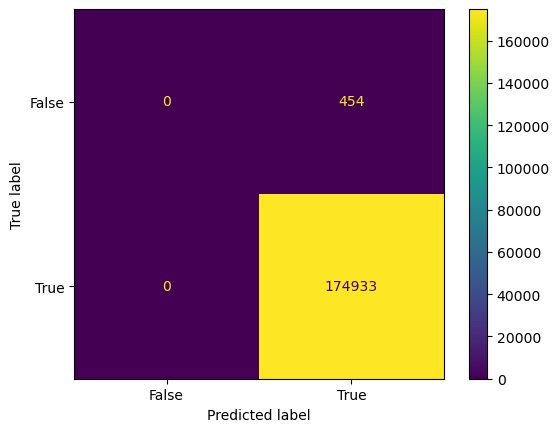

In [36]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [37]:
# Assign the coefficients to a list coef
coef = logreg.coef_
for p,c in zip(feature_cols,list(coef[0])):
    print(p + '\t' + str(c))

# Assign the intercept to the variable intercept
intercept = logreg.intercept_
print(intercept)

substation	0.18604477038470513
subject_age	0.7146319376127092
subject_race	0.18097920883914917
subject_sex	0.4254273314745508
district	0.3870022219622022
[7.21900855]


#### Decision Tree

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn import tree

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print('Model Accuracy:',accuracy_score(y_test,y_pred))
print('Model Recall:',recall_score(y_test, y_pred, average = 'micro'))
print('Model_F1 Score:',f1_score(y_test, y_pred, average = 'micro'))


Model Accuracy: 0.9973316152280386
Model Recall: 0.9973316152280386
Model_F1 Score: 0.9973316152280386


##### The Confusion Matrix created has four different quadrants:

- True Negative (Top-Left Quadrant)
- False Positive (Top-Right Quadrant)
- False Negative (Bottom-Left Quadrant)
- True Positive (Bottom-Right Quadrant)


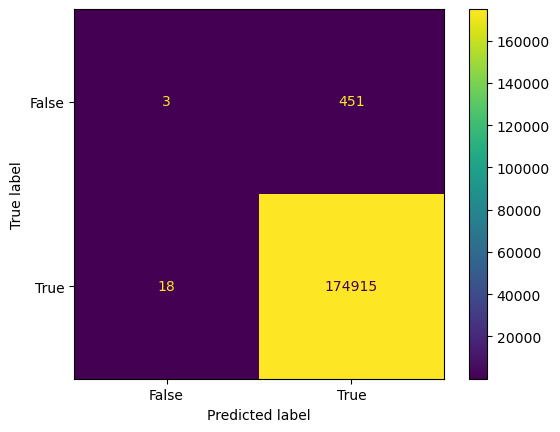

In [39]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()